In [2]:
import sys; sys.path.append('..')
import matplotlib.pyplot as plt
import random
import math
from itertools import islice
from pathlib import Path

import datagen as dg

random.seed(0)

In [6]:
cfg = dg.config.Config.from_yaml(Path('../../configs/datagen.yaml'))
env = dg.types.Environment.from_config(cfg)
wts = dg.types.wind_turbines_from_config(env, Path('../../configs/map.yaml'))
sim = dg.types.Simulation(cfg, wts, env).tick(10)

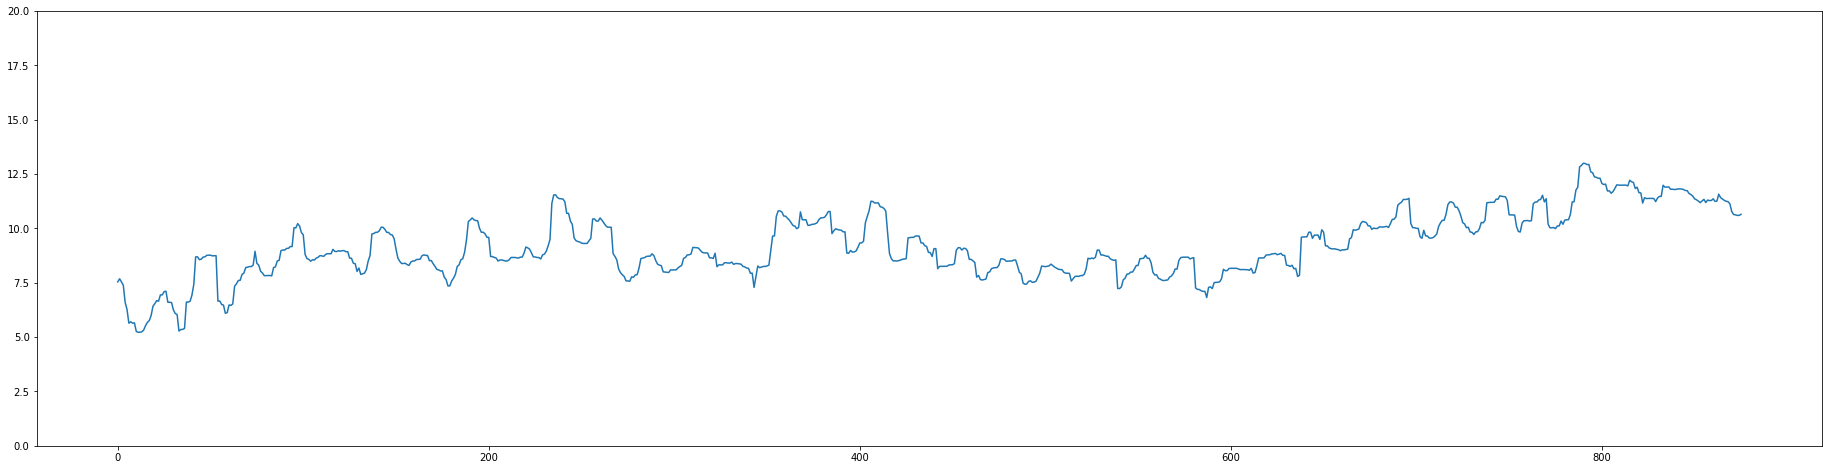

CPU times: user 995 ms, sys: 111 ms, total: 1.11 s
Wall time: 916 ms


In [7]:
%%time
N = int(0.1 * 365 * 24 * 60 * 60 / cfg.tick_freq)

readings = [sim.tick().get_readings() for _ in range(N)]
plt.figure(figsize=(32, 8))
plt.plot([d['env_temp'] for d in readings])
plt.ylim(0, 20)
plt.show()

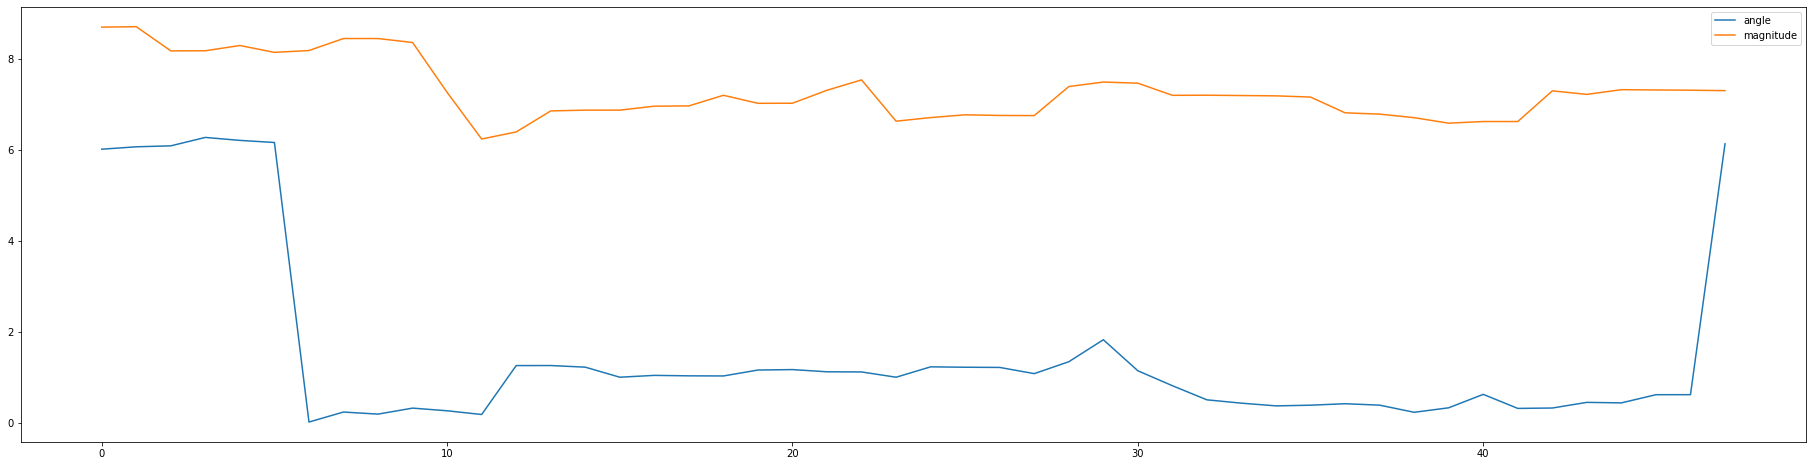

In [8]:
N = int(2 * 24 * 60 * 60 / cfg.tick_freq)
readings = [sim.tick().get_readings() for _ in range(N)]

plt.figure(figsize=(32, 8))
plt.plot([d['env_wind_angle'] for d in readings], label='angle')
plt.plot([d['env_wind_mag'] for d in readings], label='magnitude')
plt.legend()
plt.show()

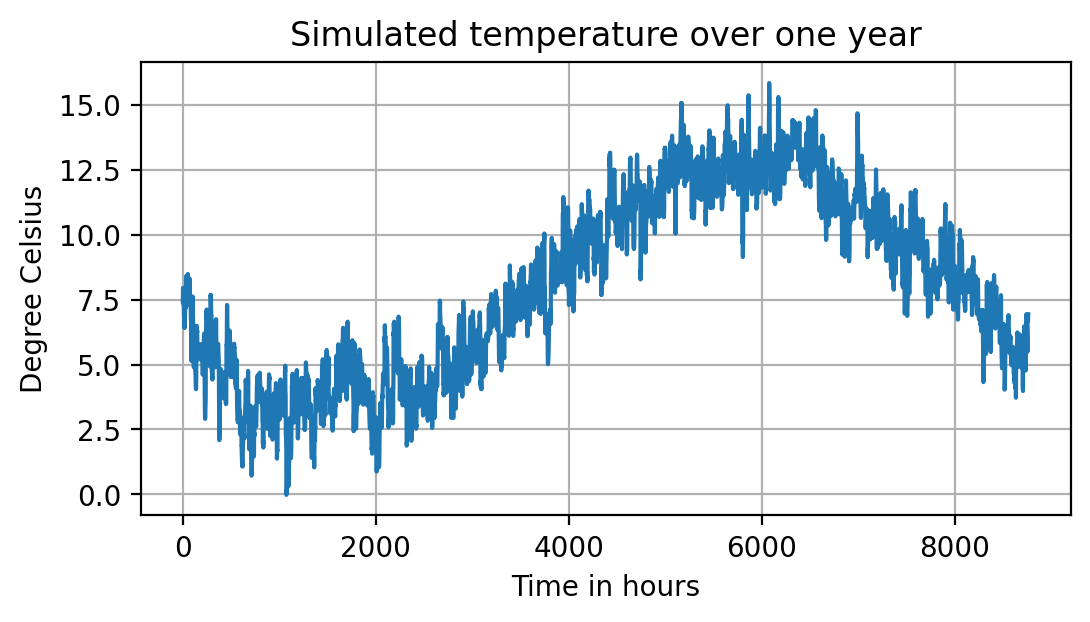

In [31]:
N = int(365 * 24 * 60 * 60 / cfg.tick_freq)
readings = [sim.tick().get_readings() for _ in range(N)]
plt.figure(figsize=(6, 3), dpi=200)
#plt.plot([d['wts'][0]['rotor_rps'] for d in readings], label='rotor RPS')
plt.plot([d['env_temp'] for d in readings], label='Environment temperature')
plt.ylabel('Degree Celsius')
plt.xlabel('Time in hours')
plt.title('Simulated temperature over one year')
#plt.legend()
plt.grid()
plt.show()

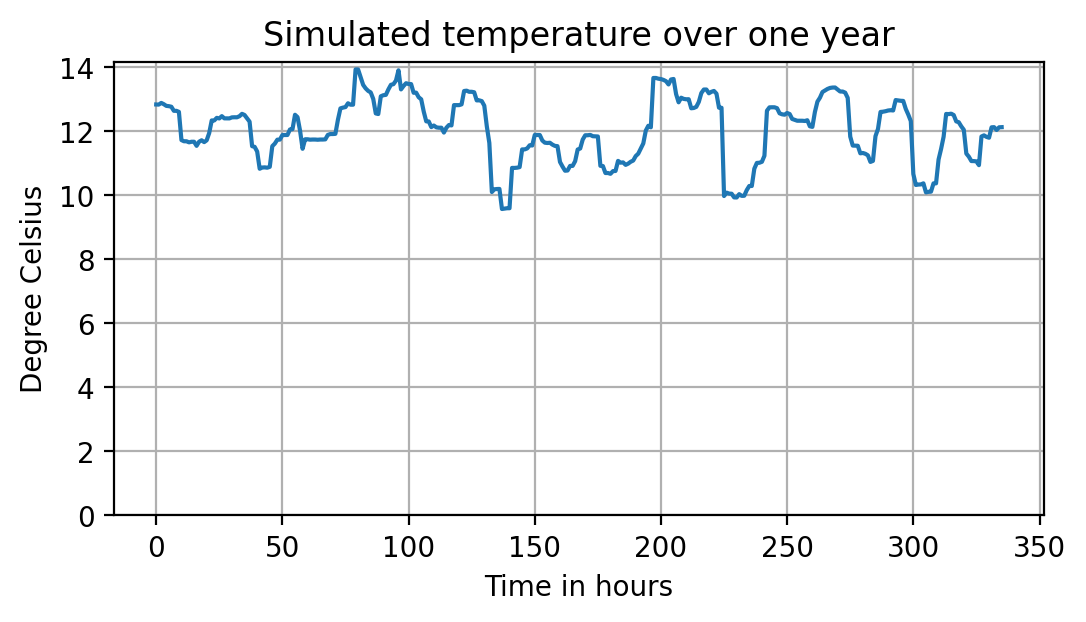

In [89]:
N = int(14 * 24 * 60 * 60 / cfg.tick_freq)
readings = [sim.tick().get_readings() for _ in range(N)]
plt.figure(figsize=(6, 3), dpi=200)
#plt.plot([d['wts'][0]['rotor_rps'] for d in readings], label='rotor RPS')
plt.plot([d['env_temp'] for d in readings], label='Environment temperature')
plt.ylabel('Degree Celsius')
plt.xlabel('Time in hours')
plt.title('Simulated temperature over one year')
#plt.legend()
plt.ylim(0, None)
plt.grid()
plt.show()

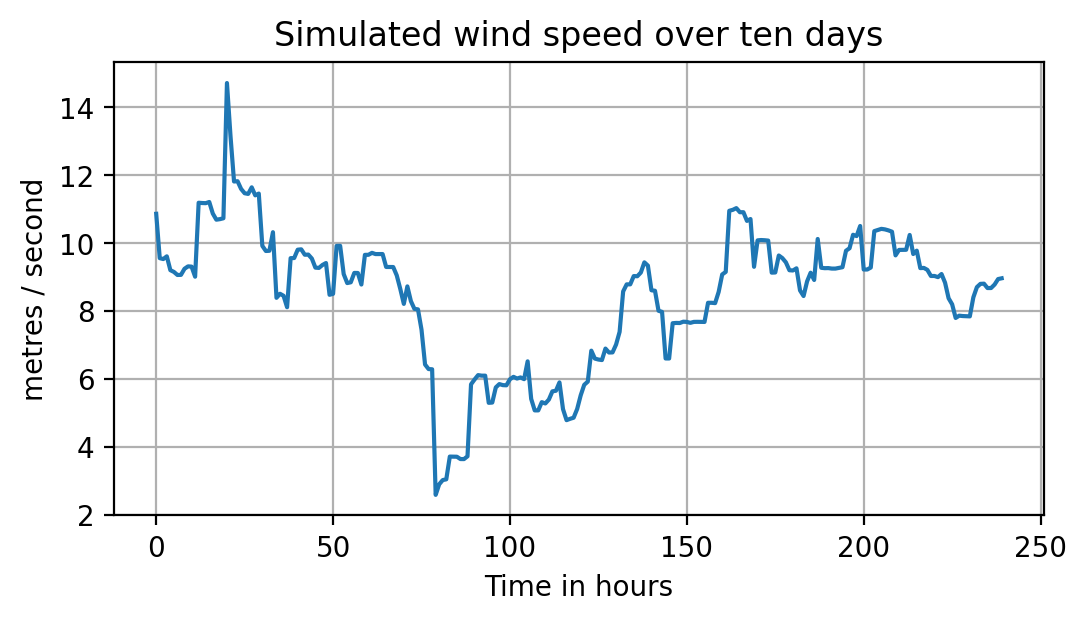

In [78]:
N = int(10 * 24 * 60 * 60 / cfg.tick_freq)
readings = [sim.tick().get_readings() for _ in range(N)]

#print(readings[0])

plt.figure(figsize=(6, 3), dpi=200)
plt.plot([d['env_wind_mag'] for d in readings], label='Wind speed')
plt.ylabel('metres / second')
plt.xlabel('Time in hours')
plt.title('Simulated wind speed over ten days')
#plt.legend()
plt.grid()
plt.show()

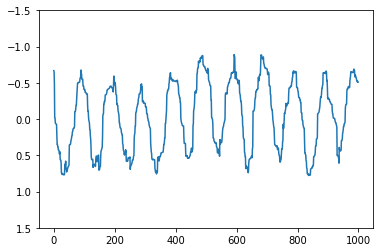

In [10]:
ac = dg.utils.Autocorr(lambda x: math.sin(x) + random.gauss(0., 0.5), alpha=0.5, beta=10, increment=2 * math.pi / 100)
xs = list(islice(ac, 0, 1000))
plt.plot(xs)
plt.ylim(1.5, -1.5)
plt.show()